In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import datetime

In [2]:
stocks = ['AAPL', 'GOOGL', 'MSFT', 'AMZN', 'META', 'TSLA', 'JPM', 'V', 'JNJ', 'WMT']

# Descending Triangle
A descending triangle is a bearish chart pattern, indicating that demand is decreasing, and a descending upper trend line suggests a breakdown is likely to occur. 

[*********************100%***********************]  1 of 1 completed


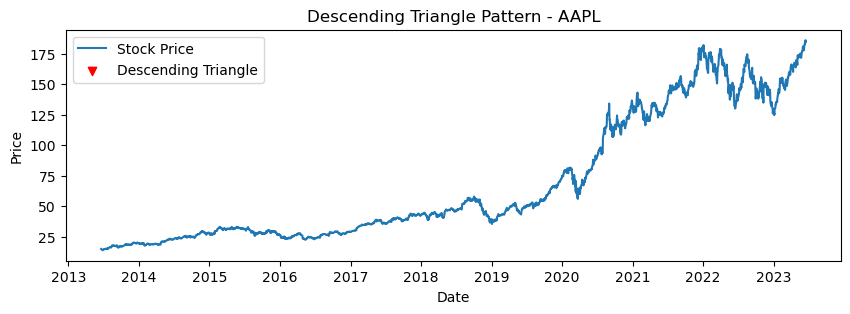

[*********************100%***********************]  1 of 1 completed


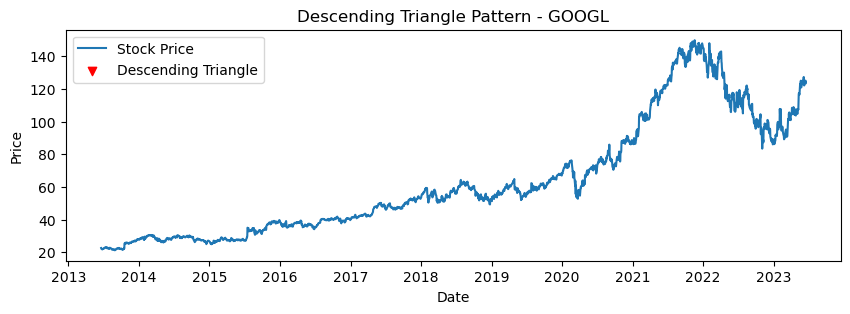

[*********************100%***********************]  1 of 1 completed


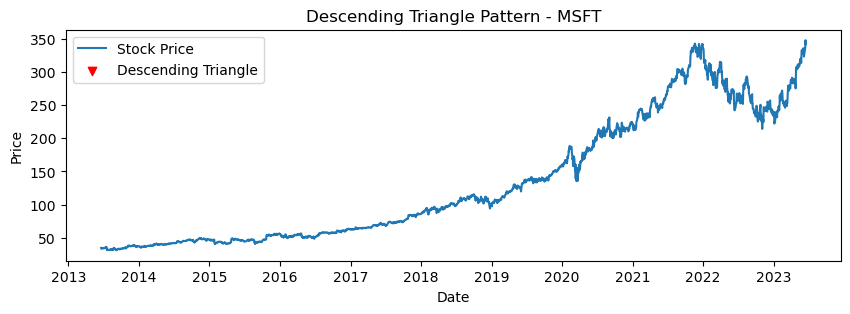

[*********************100%***********************]  1 of 1 completed


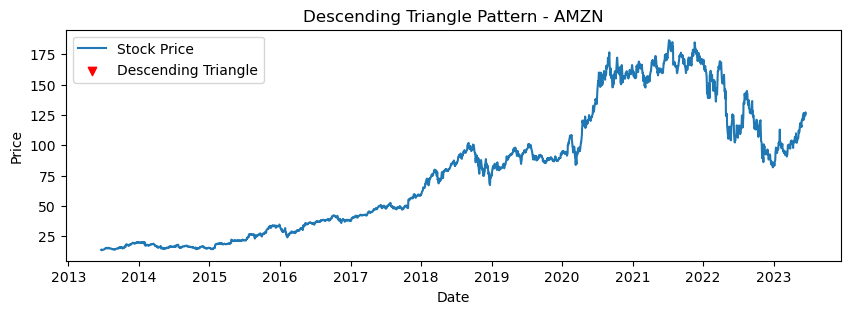

[*********************100%***********************]  1 of 1 completed


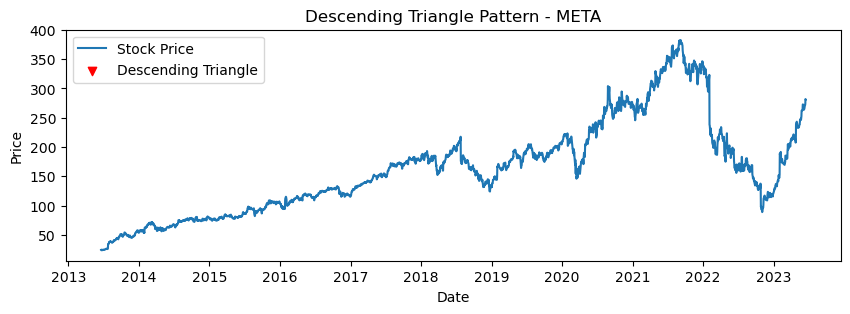

[*********************100%***********************]  1 of 1 completed


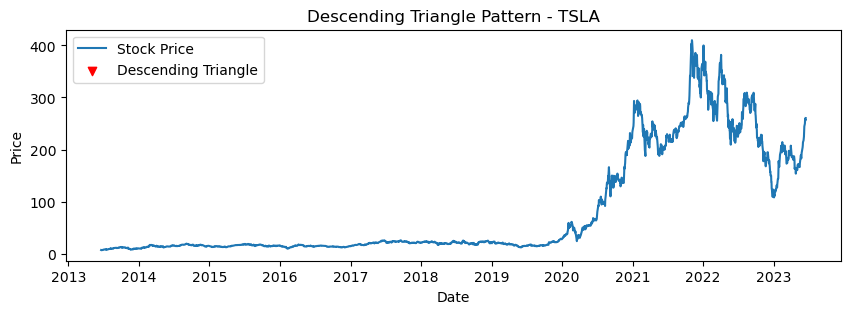

[*********************100%***********************]  1 of 1 completed


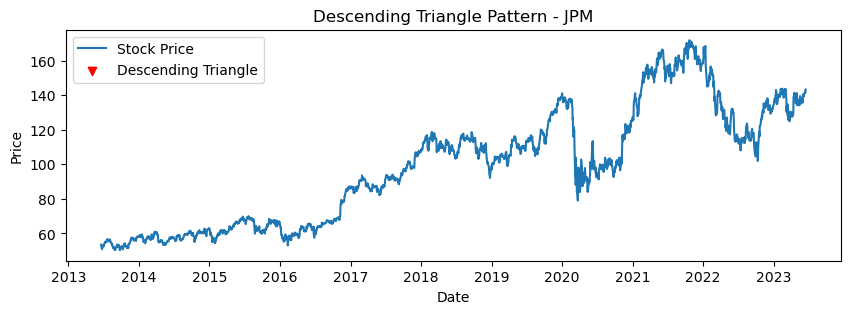

[*********************100%***********************]  1 of 1 completed


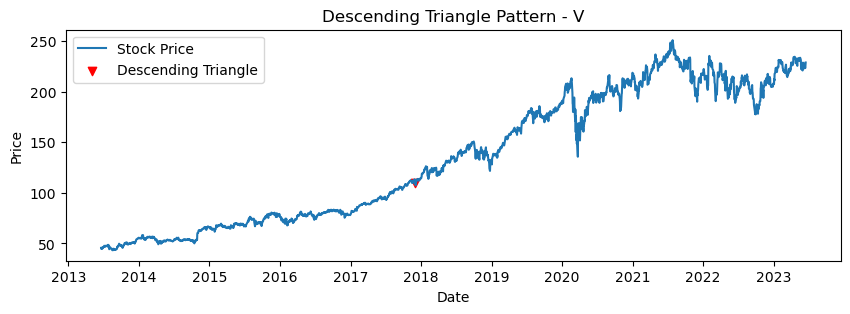

[*********************100%***********************]  1 of 1 completed


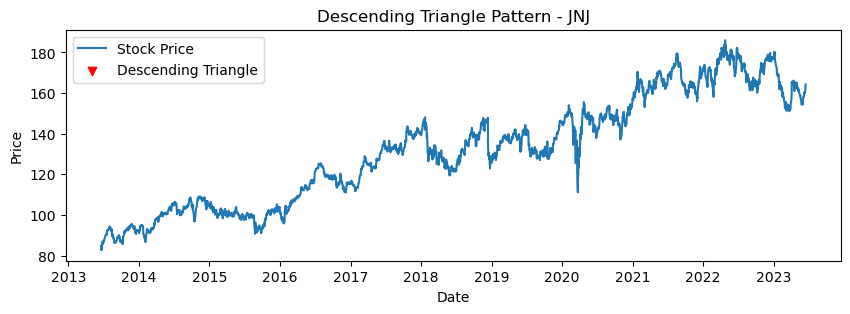

[*********************100%***********************]  1 of 1 completed


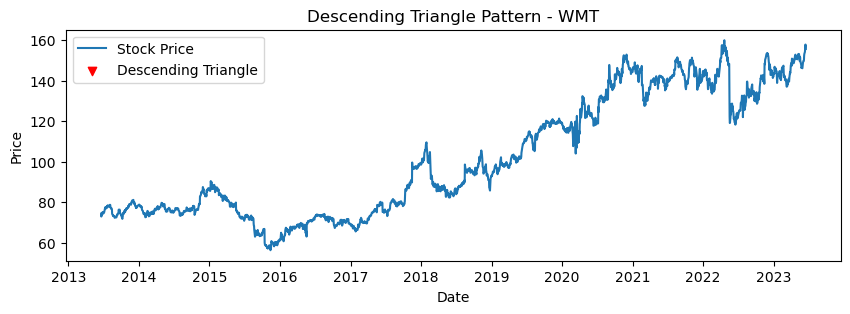

In [3]:
for symbol in stocks:
    stock_data = yf.download(symbol, start='2013-06-19', end='2023-06-19')
    descending_triangle = (stock_data['High'].rolling(window=30).max() == stock_data['High']) & \
                          (stock_data['Low'].rolling(window=30).min().shift(1) == stock_data['Low'])
    stock_data['DescendingTriangle'] = descending_triangle.astype(int)
    # Plot the trend
    plt.figure(figsize=(10, 3))
    plt.plot(stock_data.index, stock_data['Close'], label='Stock Price')
    plt.scatter(stock_data[stock_data['DescendingTriangle'] == 1].index, stock_data[stock_data['DescendingTriangle'] == 1]['Close'], marker='v', color='red', label='Descending Triangle')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(f'Descending Triangle Pattern - {symbol}')
    plt.legend()
    plt.show()


# Bull Flag
Flags are continuation patterns constructed using two parallel trendlines that can slope up, down, or sideways (horizontal). A flag with an upward slope (bullish) appears as a pause in a down trending market, also known as Bull Flag

[*********************100%***********************]  1 of 1 completed


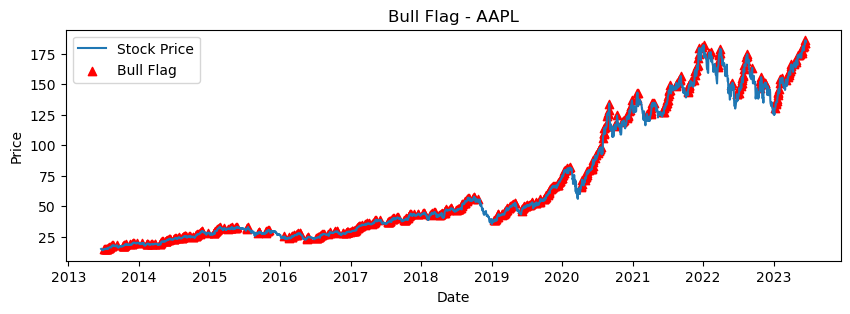

[*********************100%***********************]  1 of 1 completed


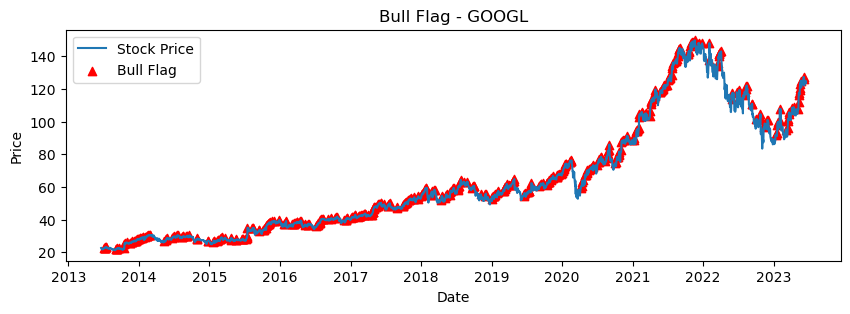

[*********************100%***********************]  1 of 1 completed


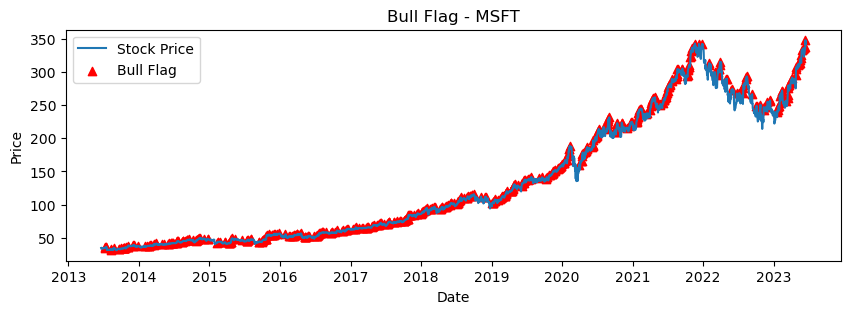

[*********************100%***********************]  1 of 1 completed


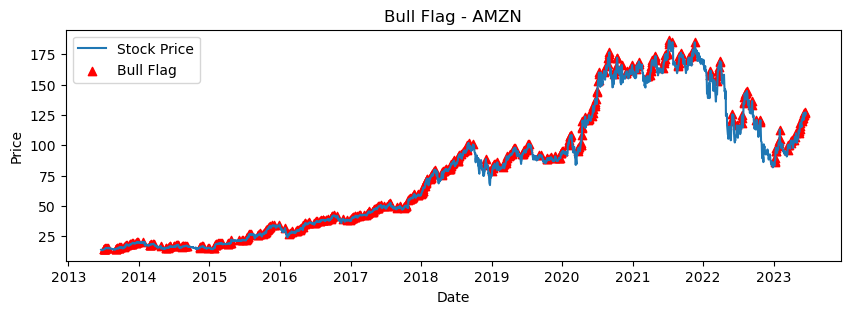

[*********************100%***********************]  1 of 1 completed


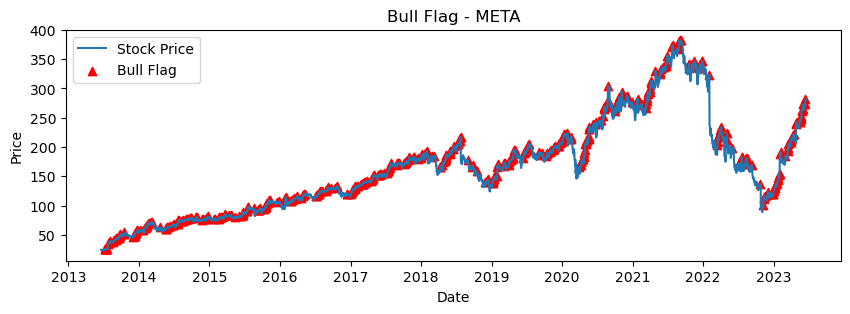

[*********************100%***********************]  1 of 1 completed


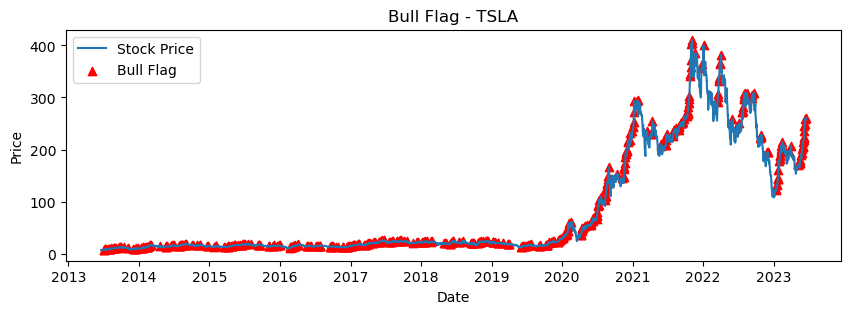

[*********************100%***********************]  1 of 1 completed


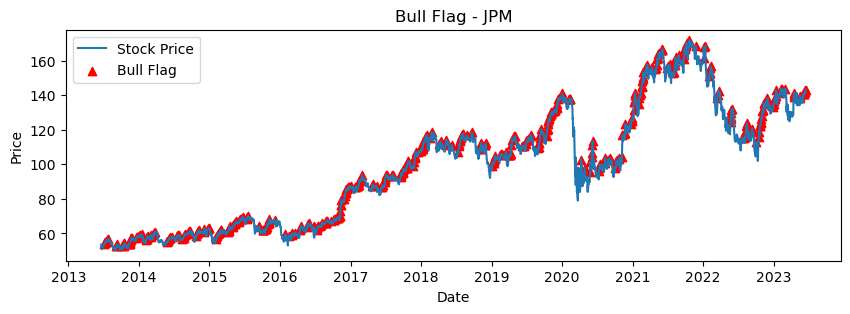

[*********************100%***********************]  1 of 1 completed


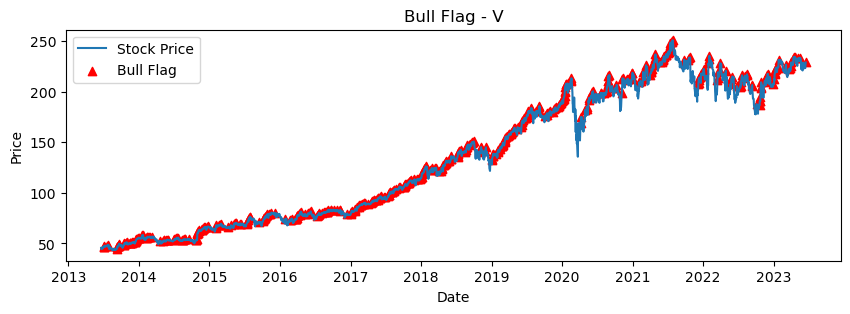

[*********************100%***********************]  1 of 1 completed


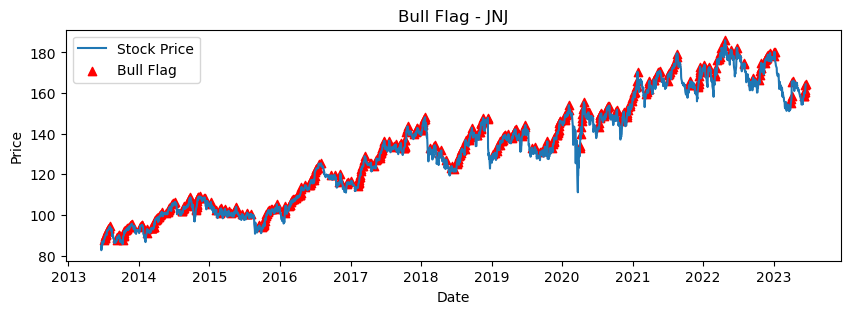

[*********************100%***********************]  1 of 1 completed


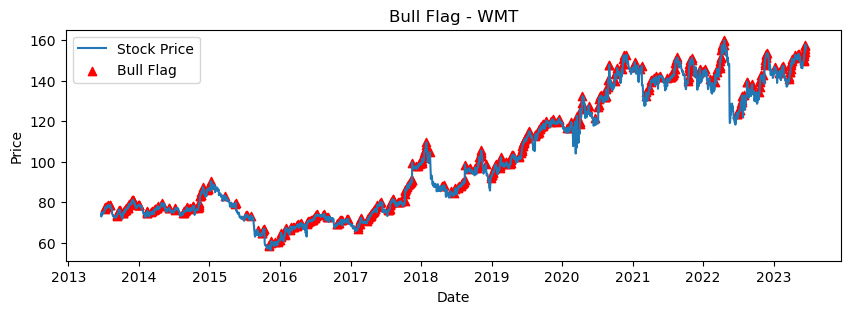

In [4]:
for symbol in stocks:
    stock_data = yf.download(symbol, start='2013-06-19', end='2023-06-19')
    bull_flag = (stock_data['Close'].rolling(window=10).max() == stock_data['Close'])
    stock_data['BullFlag'] = bull_flag.astype(int)
    # Plot the trend
    plt.figure(figsize=(10, 3))
    plt.plot(stock_data.index, stock_data['Close'], label='Stock Price')
    plt.scatter(stock_data[stock_data['BullFlag'] == 1].index, stock_data[stock_data['BullFlag'] == 1]['Close'],marker= '^', color='red', label='Bull Flag')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(f'Bull Flag - {symbol}')
    plt.legend()
    plt.show()

# Inverse cup and handle
An 'inverted cup and handle' is a chart pattern that indicates bearish continuation, triggering a sell signal. Think of it as an upside-down cup and handle. 

[*********************100%***********************]  1 of 1 completed


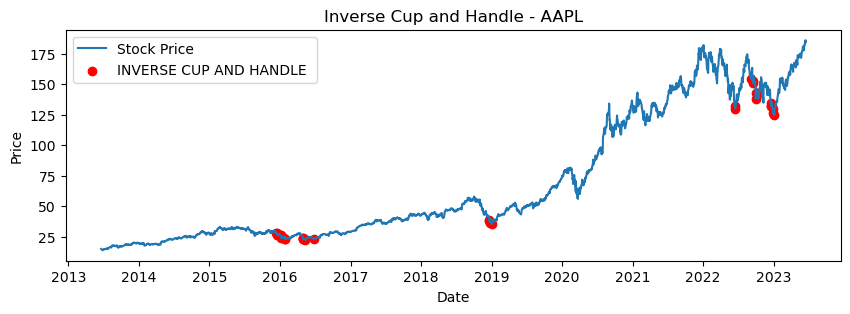

[*********************100%***********************]  1 of 1 completed


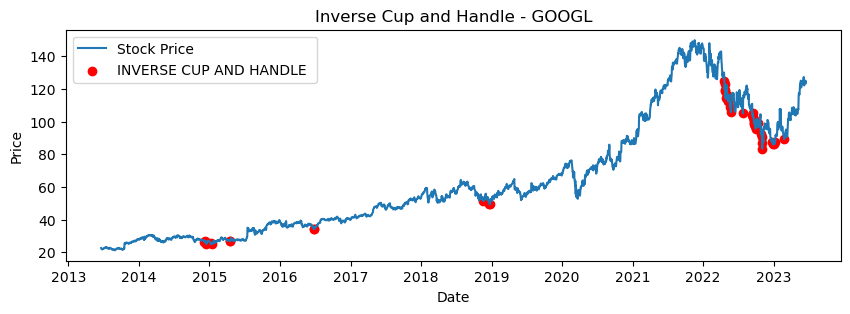

[*********************100%***********************]  1 of 1 completed


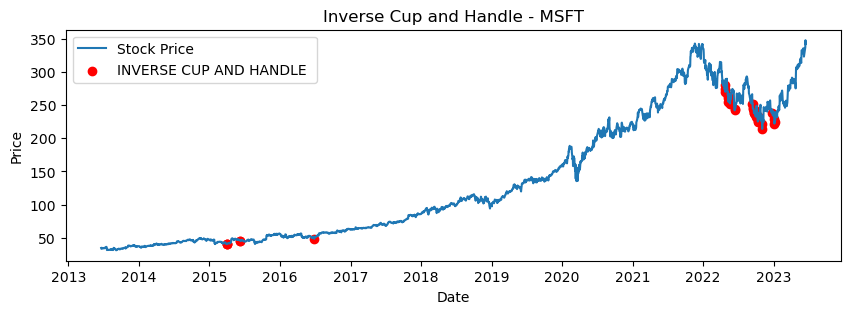

[*********************100%***********************]  1 of 1 completed


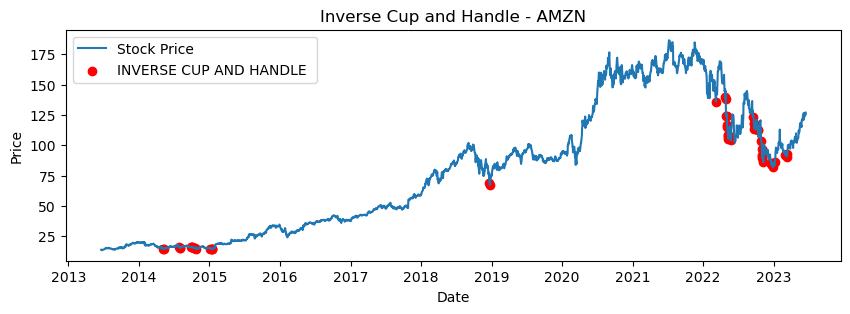

[*********************100%***********************]  1 of 1 completed


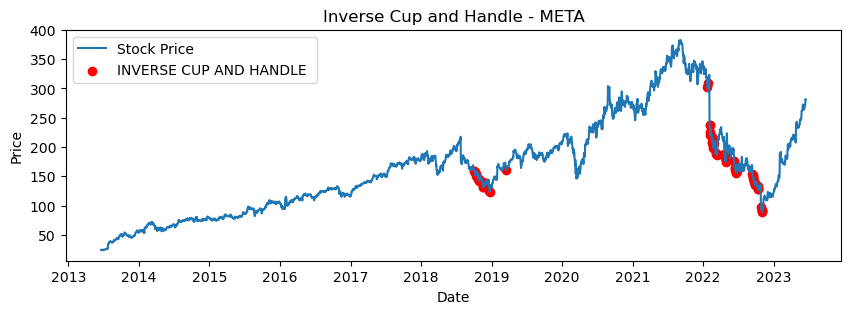

[*********************100%***********************]  1 of 1 completed


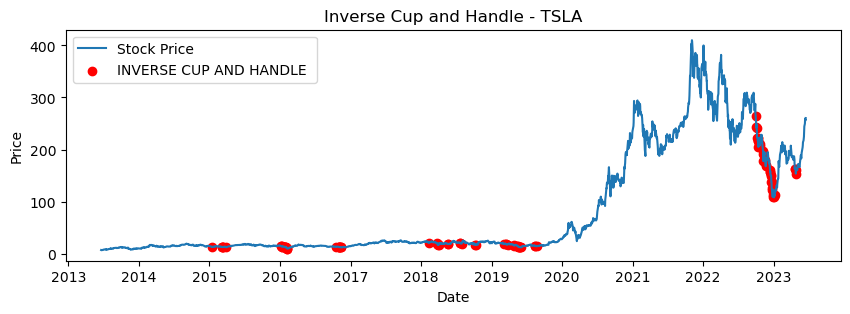

[*********************100%***********************]  1 of 1 completed


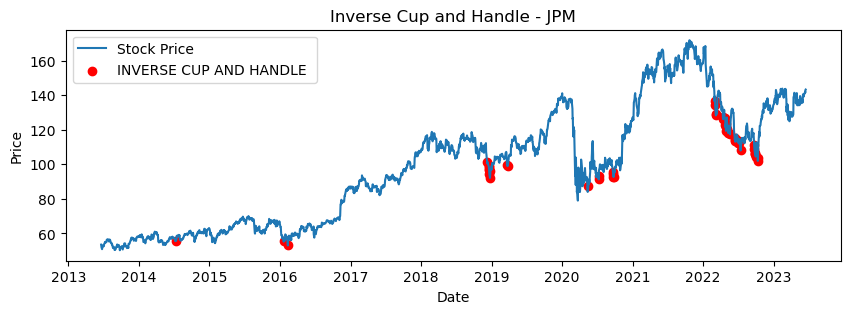

[*********************100%***********************]  1 of 1 completed


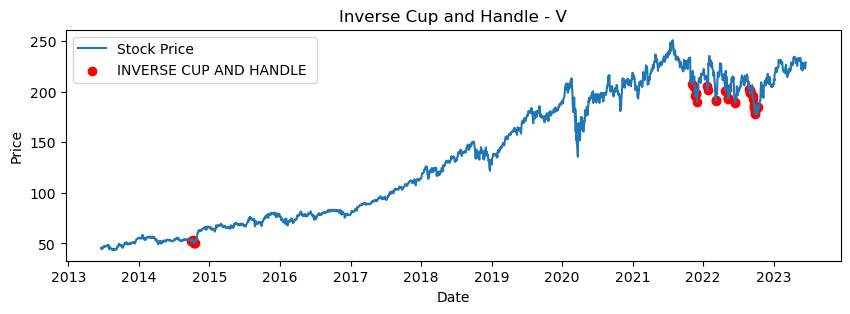

[*********************100%***********************]  1 of 1 completed


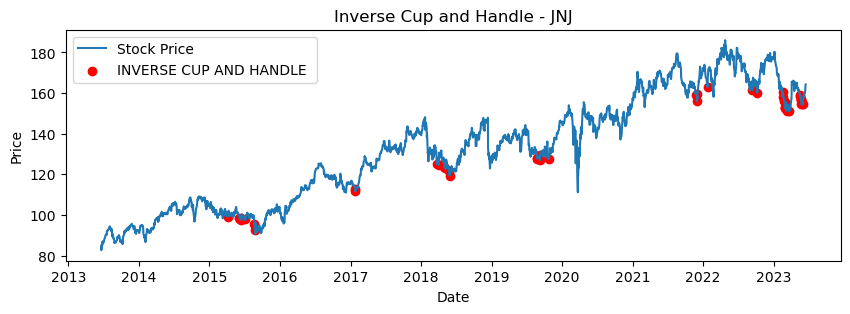

[*********************100%***********************]  1 of 1 completed


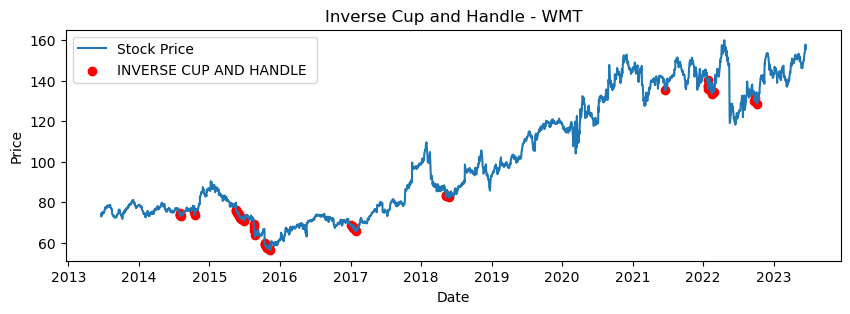

In [5]:
for symbol in stocks:
    stock_data = yf.download(symbol, start='2013-06-19', end='2023-06-19')
    inverse_cup_handle = (stock_data['Low'].rolling(window=30).min() == stock_data['Low']) & \
                         (stock_data['Close'].rolling(window=50).mean() < stock_data['Close'].rolling(window=200).mean())
    stock_data['InverseCupHandle'] = inverse_cup_handle.astype(int)
    plt.figure(figsize=(10, 3))
    plt.plot(stock_data.index, stock_data['Close'], label='Stock Price')
    plt.scatter(stock_data[stock_data['InverseCupHandle'] == 1].index, stock_data[stock_data['InverseCupHandle'] == 1]['Close'], color='red', label='INVERSE CUP AND HANDLE ')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(f'Inverse Cup and Handle - {symbol}')
    plt.legend()
    plt.show()

# Inverse head and shoulder
This pattern is identified when the price action of a security meets the following characteristics: the price falls to a trough and then rises; the price falls below the former trough and then rises again; finally, the price falls again but not as far as the second trough. Once the final trough is made, the price heads upward, toward the resistance found near the top of the previous troughs.

[*********************100%***********************]  1 of 1 completed


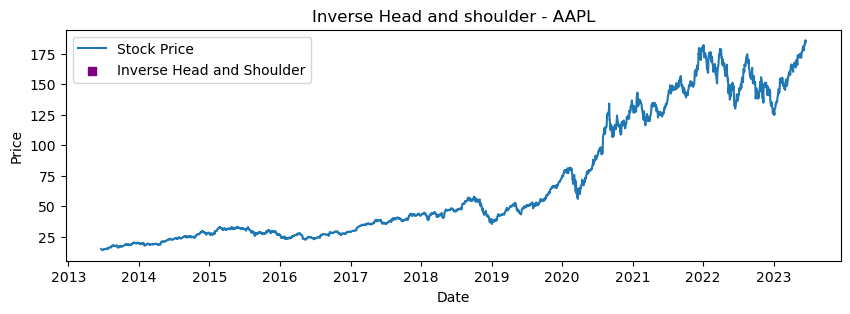

[*********************100%***********************]  1 of 1 completed


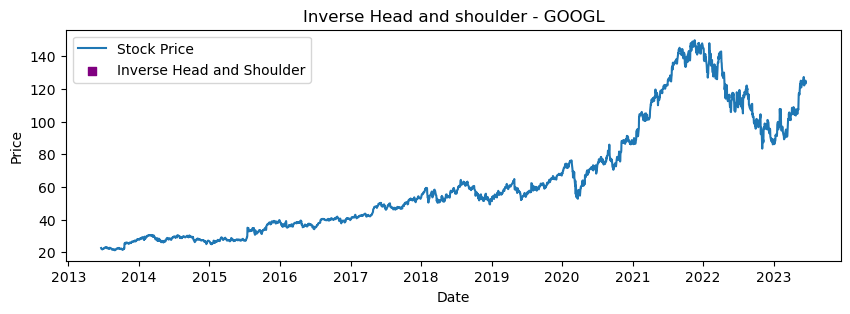

[*********************100%***********************]  1 of 1 completed


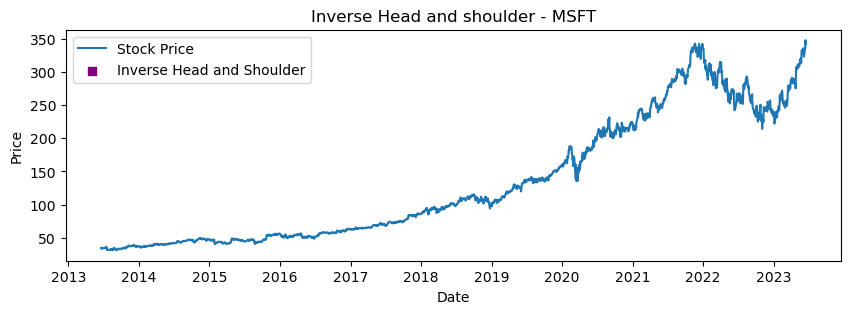

[*********************100%***********************]  1 of 1 completed


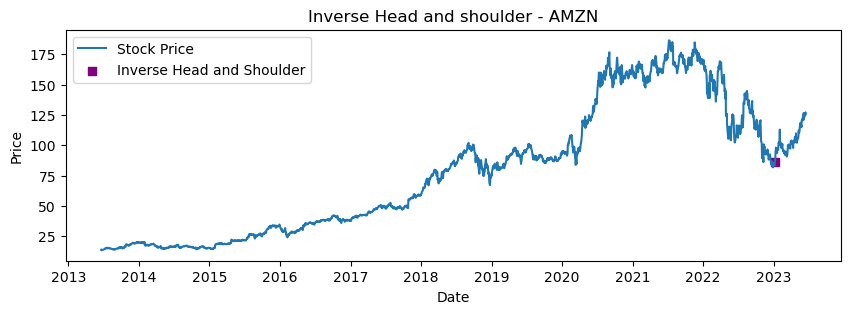

[*********************100%***********************]  1 of 1 completed


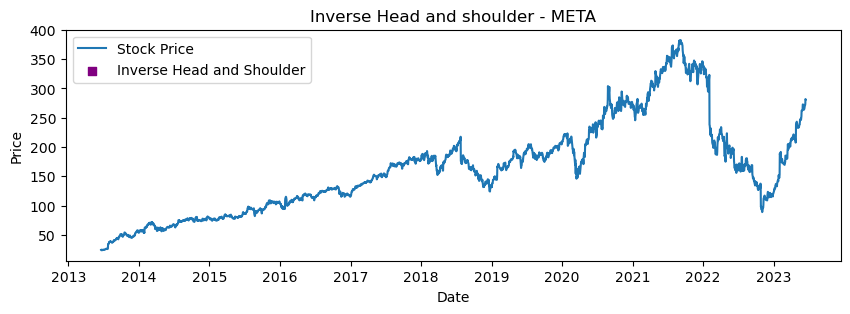

[*********************100%***********************]  1 of 1 completed


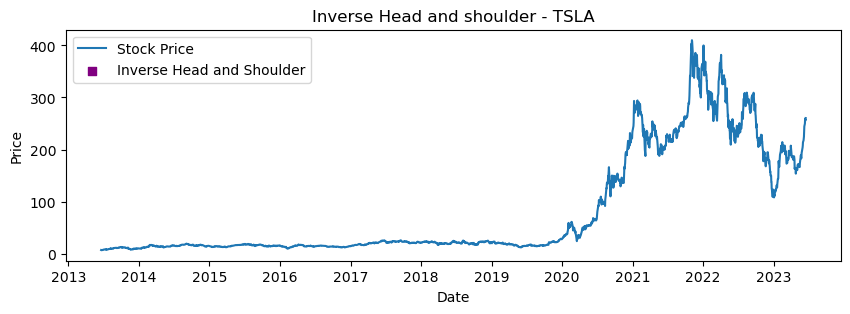

[*********************100%***********************]  1 of 1 completed


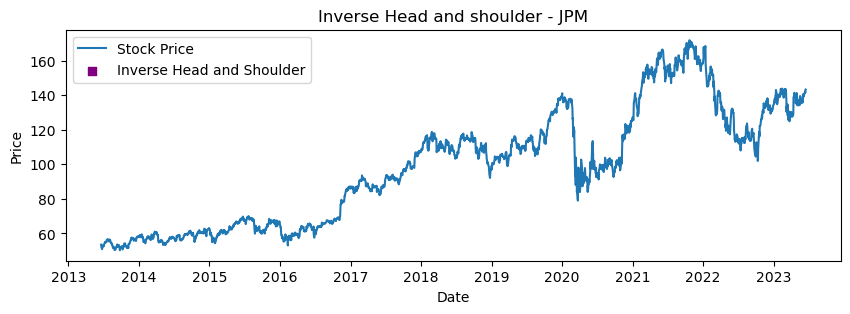

[*********************100%***********************]  1 of 1 completed


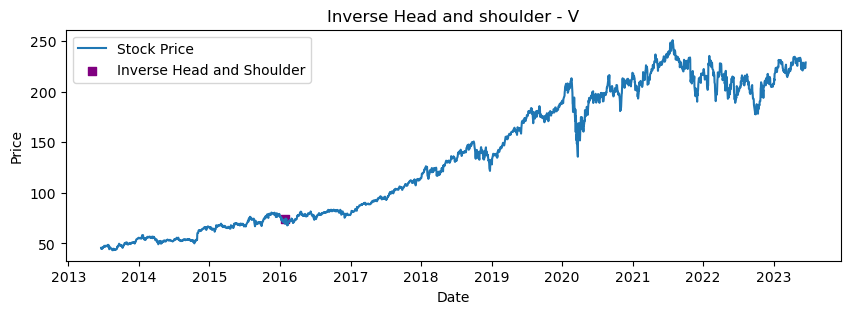

[*********************100%***********************]  1 of 1 completed


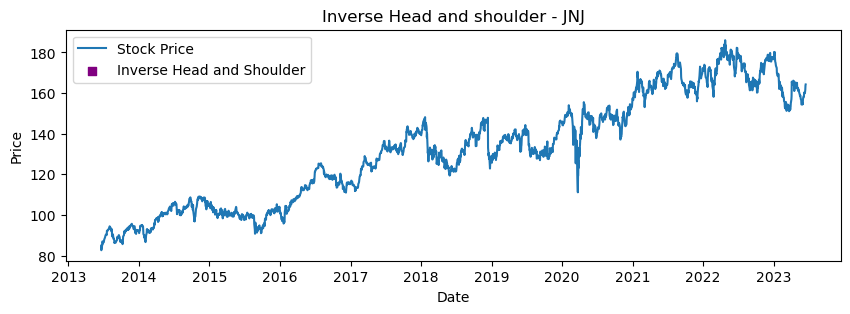

[*********************100%***********************]  1 of 1 completed


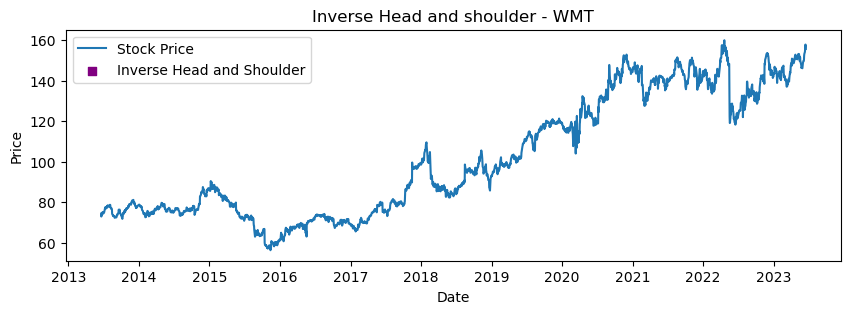

In [6]:
for symbol in stocks:
    stock_data = yf.download(symbol, start='2013-06-19', end='2023-06-19')
    inverse_head_shoulder = (stock_data['Low'].rolling(window=30).min() == stock_data['Low']) & \
                            (stock_data['Close'].rolling(window=10).max() == stock_data['Close'])
    stock_data['InverseHeadShoulder'] = inverse_head_shoulder.astype(int)
    # Plot the trend
    plt.figure(figsize=(10, 3))
    plt.plot(stock_data.index, stock_data['Close'], label='Stock Price')
    plt.scatter(stock_data[stock_data['InverseHeadShoulder'] == 1].index, stock_data[stock_data['InverseHeadShoulder'] == 1]['Close'], marker='s', color='purple', label='Inverse Head and Shoulder')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(f'Inverse Head and shoulder - {symbol}')
    plt.legend()
    plt.show()

#  Rounding bottom
A rounding bottom is a chart pattern used in technical analysis and is identified by a series of price movements that graphically form the shape of a "U".

[*********************100%***********************]  1 of 1 completed


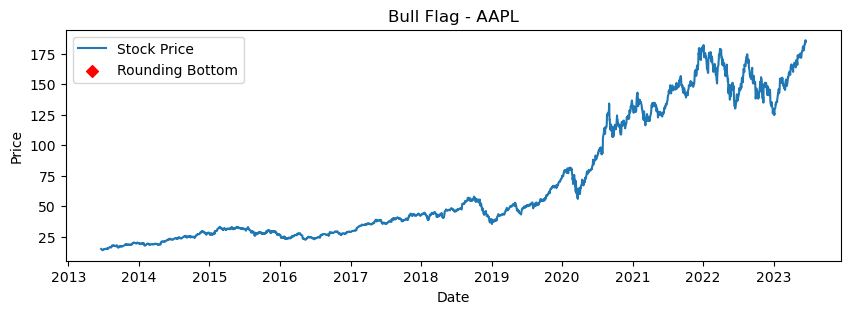

[*********************100%***********************]  1 of 1 completed


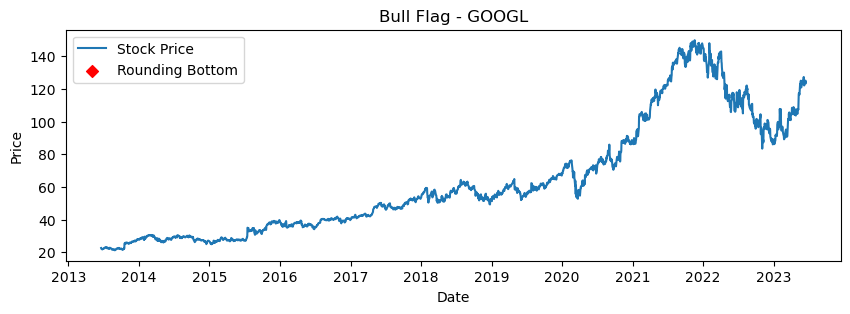

[*********************100%***********************]  1 of 1 completed


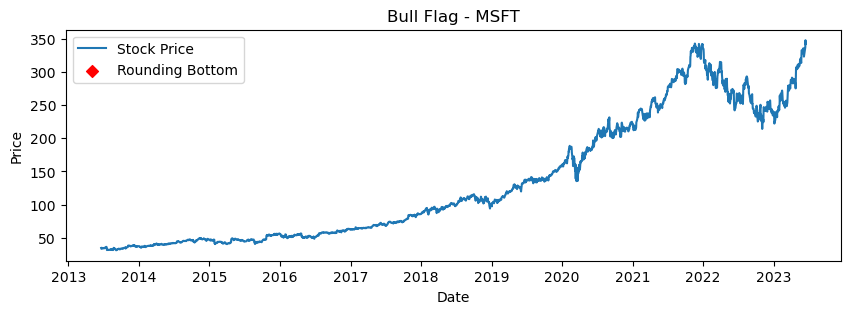

[*********************100%***********************]  1 of 1 completed


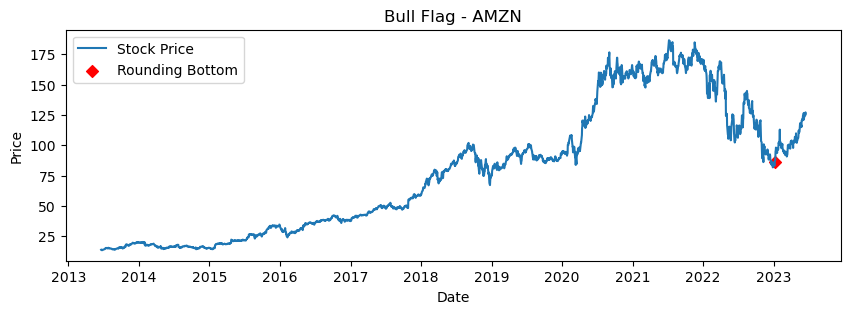

[*********************100%***********************]  1 of 1 completed


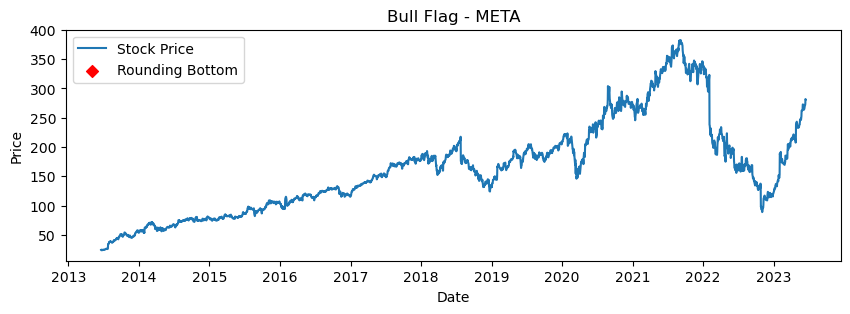

[*********************100%***********************]  1 of 1 completed


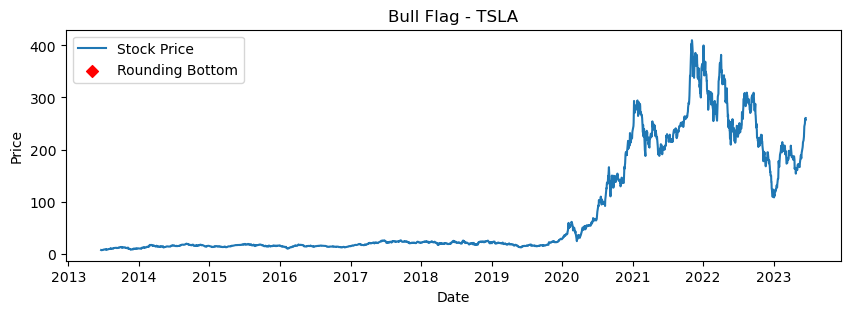

[*********************100%***********************]  1 of 1 completed


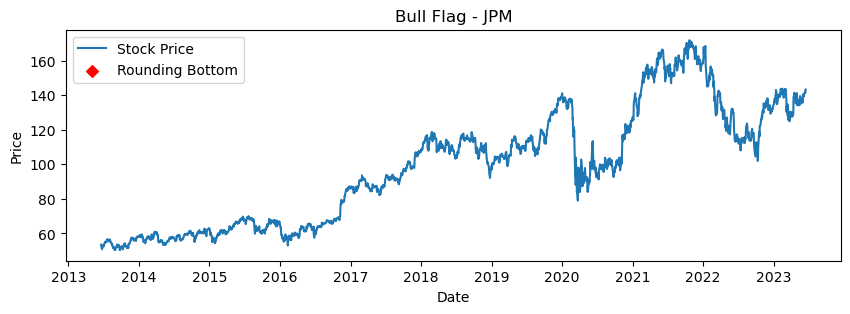

[*********************100%***********************]  1 of 1 completed


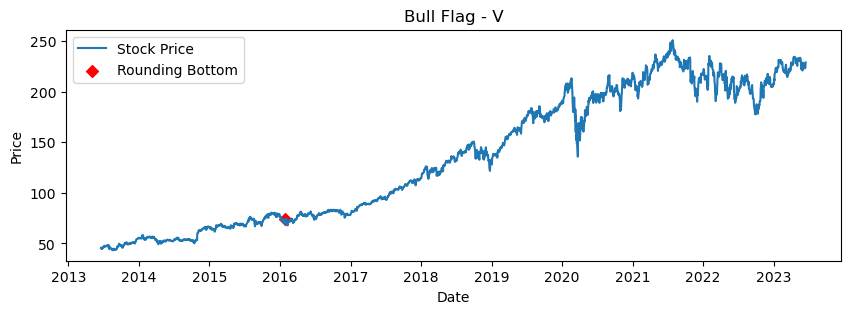

[*********************100%***********************]  1 of 1 completed


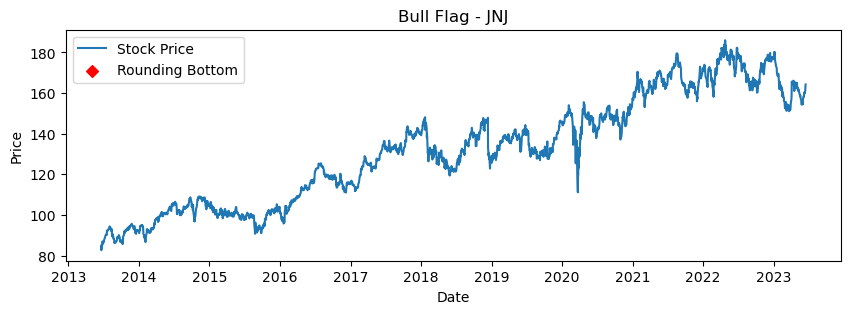

[*********************100%***********************]  1 of 1 completed


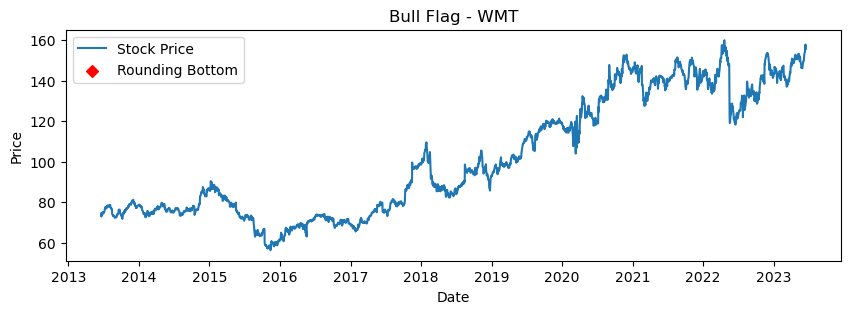

In [7]:
for symbol in stocks:
    stock_data = yf.download(symbol, start='2013-06-19', end='2023-06-19')
    rounding_bottom = (stock_data['Low'].rolling(window=30).min() == stock_data['Low']) & \
                      (stock_data['Close'].rolling(window=10).max() == stock_data['Close'])
    stock_data['RoundingBottom'] = rounding_bottom.astype(int)
    # Plot the trend
    plt.figure(figsize=(10, 3))
    plt.plot(stock_data.index, stock_data['Close'], label='Stock Price')
    plt.scatter(stock_data[stock_data['RoundingBottom'] == 1].index, stock_data[stock_data['RoundingBottom'] == 1]['Close'], marker='D', color='red', label='Rounding Bottom')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(f'Bull Flag - {symbol}')
    plt.legend()
    plt.show()